##Objetivo
Se implementara un modelo capaz de clasificar las imagenes ortorgadas por el conjunto de datos de CIFAR10, estas se dividen en 10 tipos de imagenes conformadas por 6 tipos de animales y 4 tipos de vehiculos, todo esto utilizando las herramientas otorgadas por la libreria pytorch

In [2]:
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import sampler

#Carga y normalizacion de la data



In [3]:
# compose selection
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.210, 0.210, 0.210]),
    ]
)

# download dataset
training_data = datasets.CIFAR100(
    "./data_src", train=True, download=True, transform=transform
)
test_data = datasets.CIFAR100(
    "./data_src", train=False, download=True, transform=transform
)
size = 10


train_loader = torch.utils.data.DataLoader(
    training_data, batch_size=size, shuffle=True, num_workers=4
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=size, shuffle=True, num_workers=4
)

Validation_loader = torch.utils.data.DataLoader(
    training_data,
    batch_size=size,
    sampler=sampler.SubsetRandomSampler(range(10000)),
    num_workers=4,
)

# classes
classes = training_data.classes
PATH = "./DATA/DATA.pth"


train = torch.save(
    {
        "train_dataloader": train_loader,
        "test_dataloader": test_loader,
        "validation_dataloader": Validation_loader,
        "classes": classes,
    },
    PATH,
)

Files already downloaded and verified
Files already downloaded and verified


Note: you may need to restart the kernel to use updated packages.


#Muestra del Set de entrenamiento

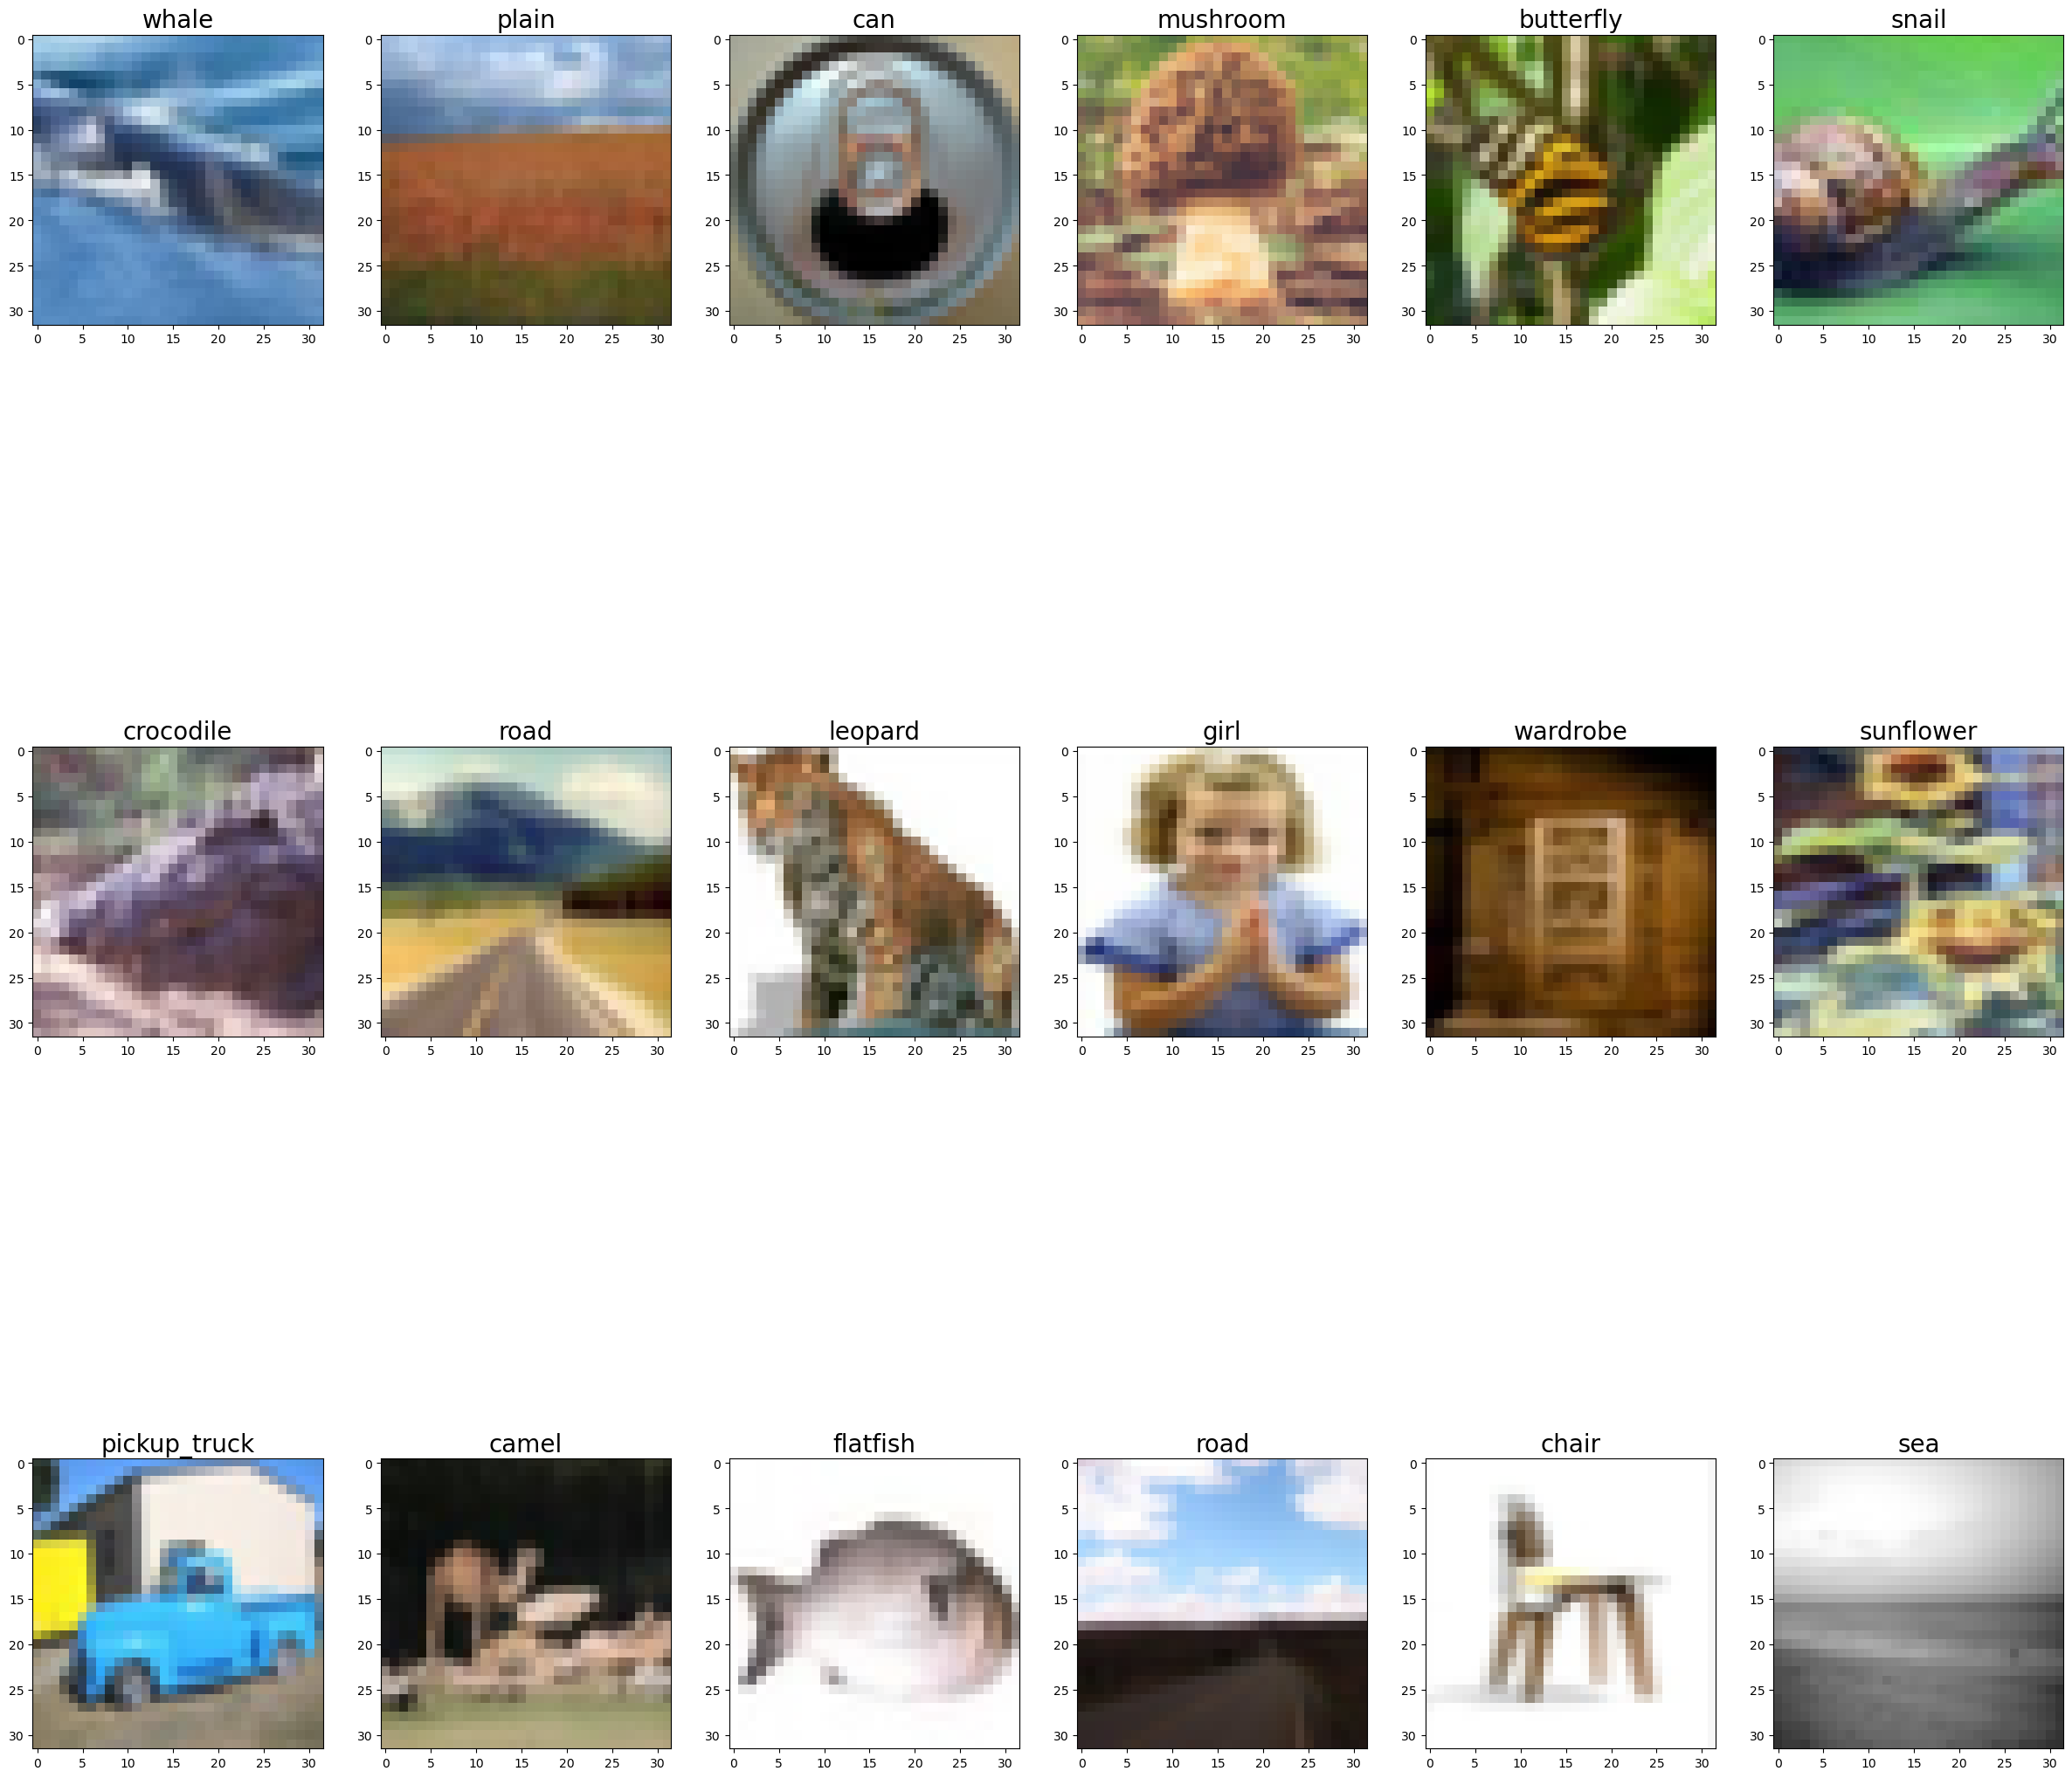

In [ ]:
# plot of the  train dataset
fig, axis = plt.subplots(nrows=3, ncols=6, figsize=(30, 30))

for ax, a in zip(axis.ravel(), range(100)):
    index = np.random.randint(len(training_data))
    ax.imshow(training_data.data[index])
    ax.set_title(classes[training_data.targets[index]], fontsize=20)

##Muestra del Set de prueba

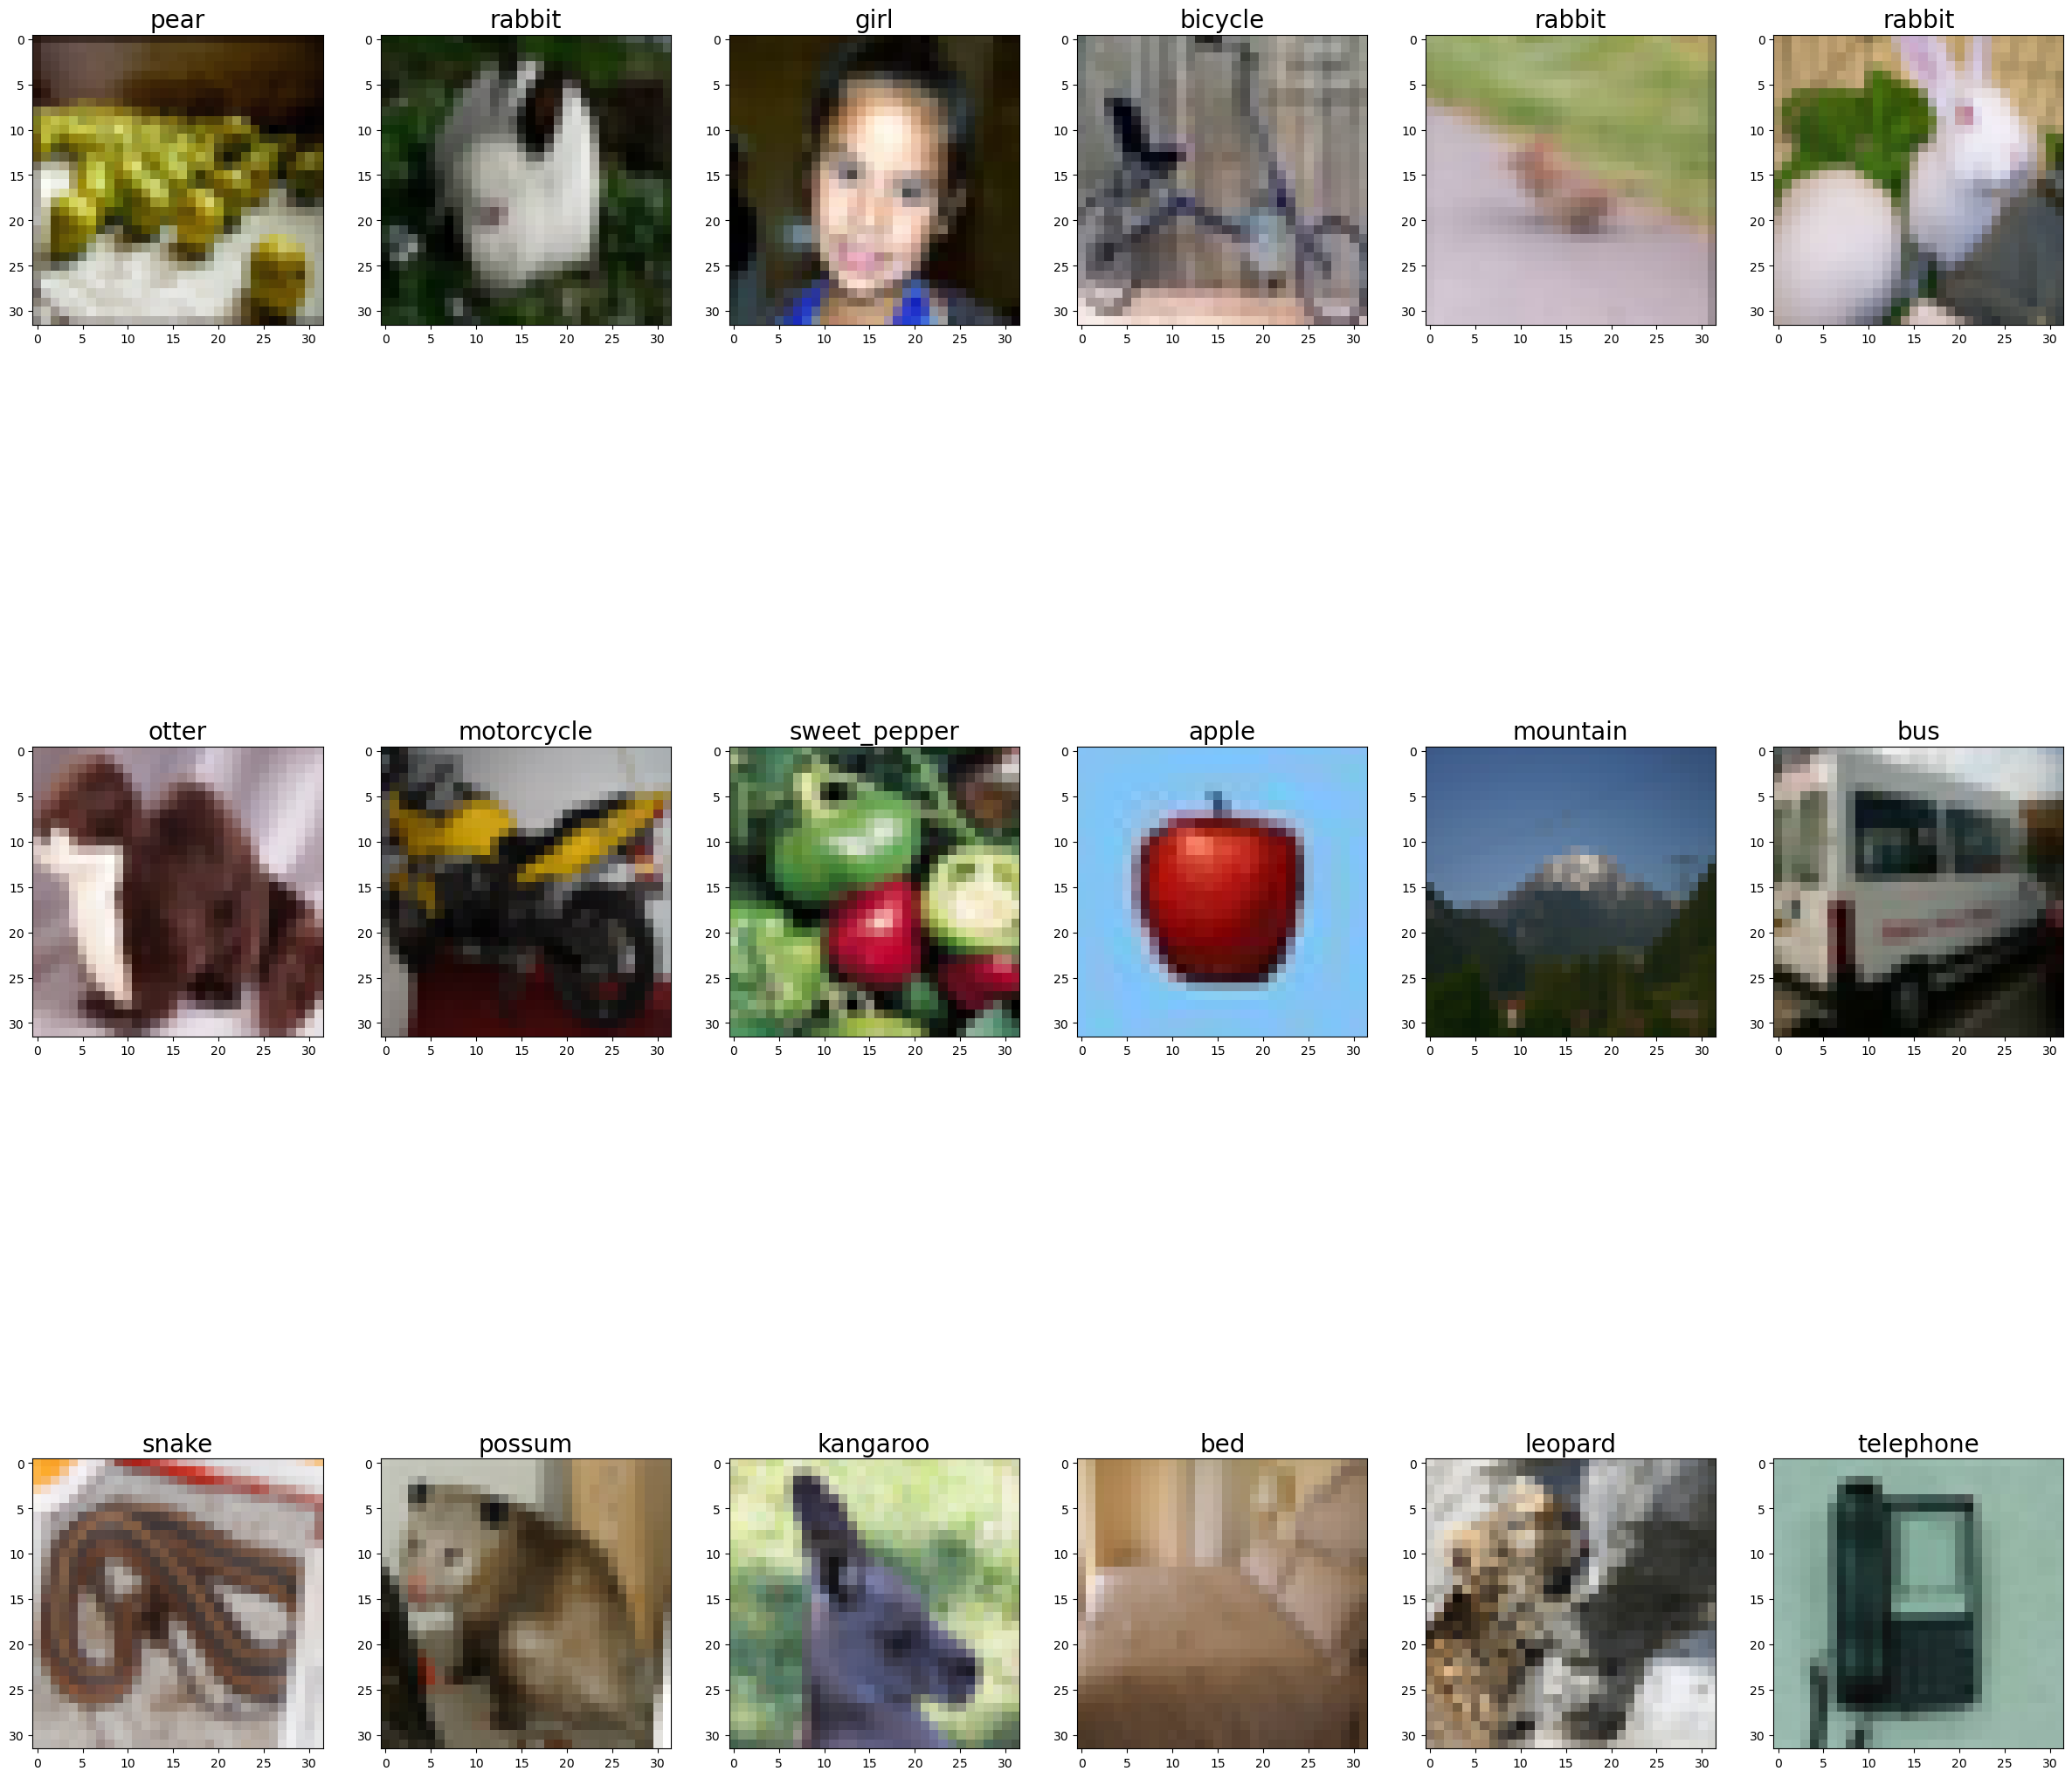

In [ ]:
# plot of the test dataset

fig, axis = plt.subplots(nrows=3, ncols=6, figsize=(30, 30))

for ax, a in zip(axis.ravel(), range(100)):
    index = np.random.randint(len(test_data))
    ax.imshow(test_data.data[index])
    ax.set_title(classes[test_data.targets[index]], fontsize=20)